In [1]:
setwd("/projects/CARDIPS/analysis/scRNAseq_validation/heart")

In [8]:
library(dplyr)
library(Seurat)
library(patchwork)
library(ggplot2)

In [11]:
load("Robj/obj.LV.scaled.mapped.R")

In [31]:
dim(obj)

[1] 29357 33050

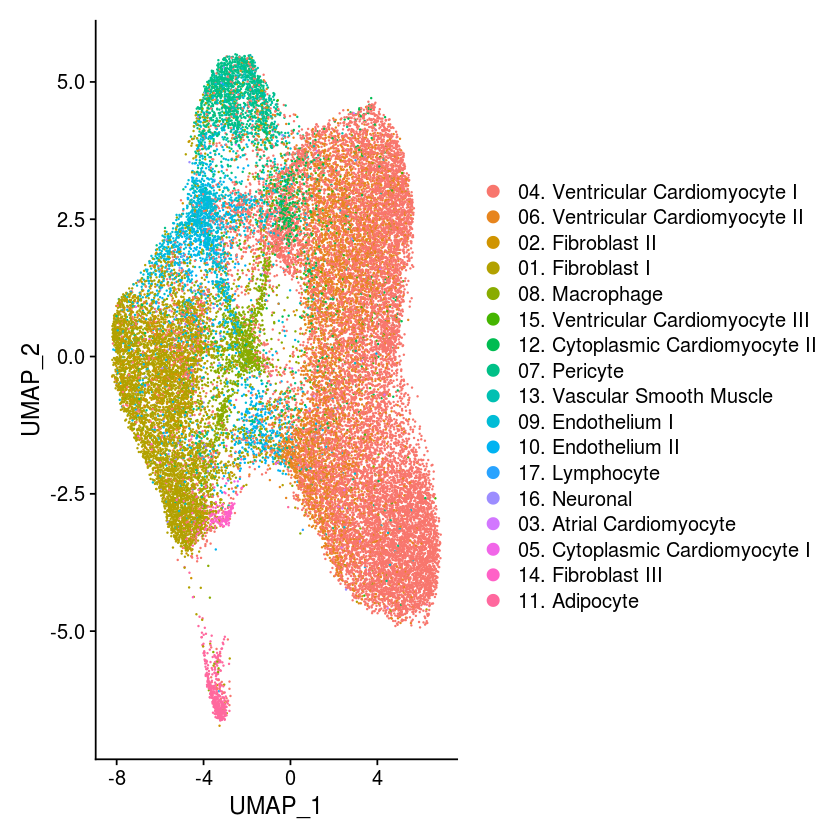

In [16]:
DimPlot(obj)

In [23]:
annot <- read.table("annotation_lookup.txt", header=T, sep="\t")
annot <- annot %>% group_by(cluster) %>% top_n(1)
annot <- annot %>% filter(annot!="")

Selecting by sub



In [33]:
ident <- factor(sapply(Idents(obj), function(cluster) {
    r <- annot[annot$cluster==cluster,]
    if (nrow(r) > 0) { return(r$annot) }
    else { return(NA) }
}))

In [40]:
summary(ident)

cardiac_muscle cardiac_neuron    endothelial     fibroblast         immune 
         20460             94           2416           6272             11 
 smooth_muscle           NA's 
           217           3580

In [37]:
obj <- AddMetaData(obj, ident, col.name="ident.cell")
Idents(obj) <- obj@meta.data$ident.cell

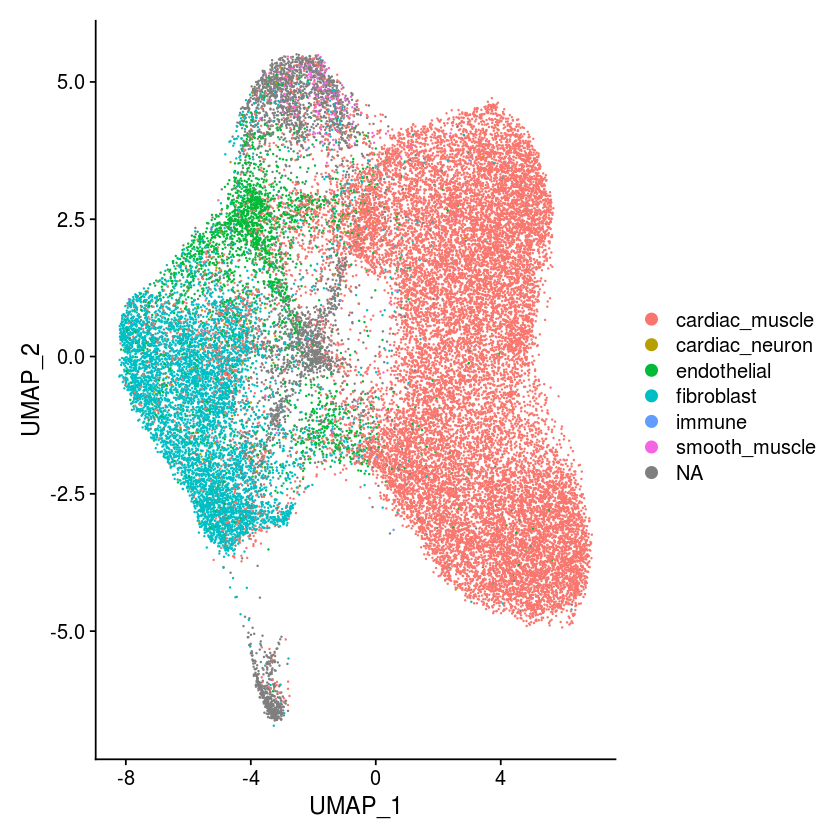

In [39]:
DimPlot(obj)

In [45]:
bulk <- read.table("diffexp_cell.txt", header=T)
bulk <- bulk[bulk$type=="gene_tpm",]
bulk$cell_type <- sub("cibersort.regular.", "", bulk$cell_type)

In [48]:
data <- GetAssayData(obj)

In [52]:
dim(data)
dim(bulk)
length(which(rownames(data) %in% bulk$gene_name))

[1] 29357 33050

[1] 163144     11

[1] 18534

In [127]:
func_p <- function(cell, avg_logFC) {
    x <- merge(avg_logFC, bulk[bulk$cell_type==cell,c("beta","gene_name")],
              by.x="row.names", by.y="gene_name", all=F)
    c <- cor(x$beta, x$avg_logFC)
    ggplot(x, aes(beta, avg_logFC)) + geom_point() +
    geom_smooth(method="lm") +
    ggtitle(paste(cell, paste0("R=",round(c,digits=2)), paste0(nrow(x), "genes"),
                 paste0(length(which(ident==cell)), "cells")))
}

`geom_smooth()` using formula 'y ~ x'



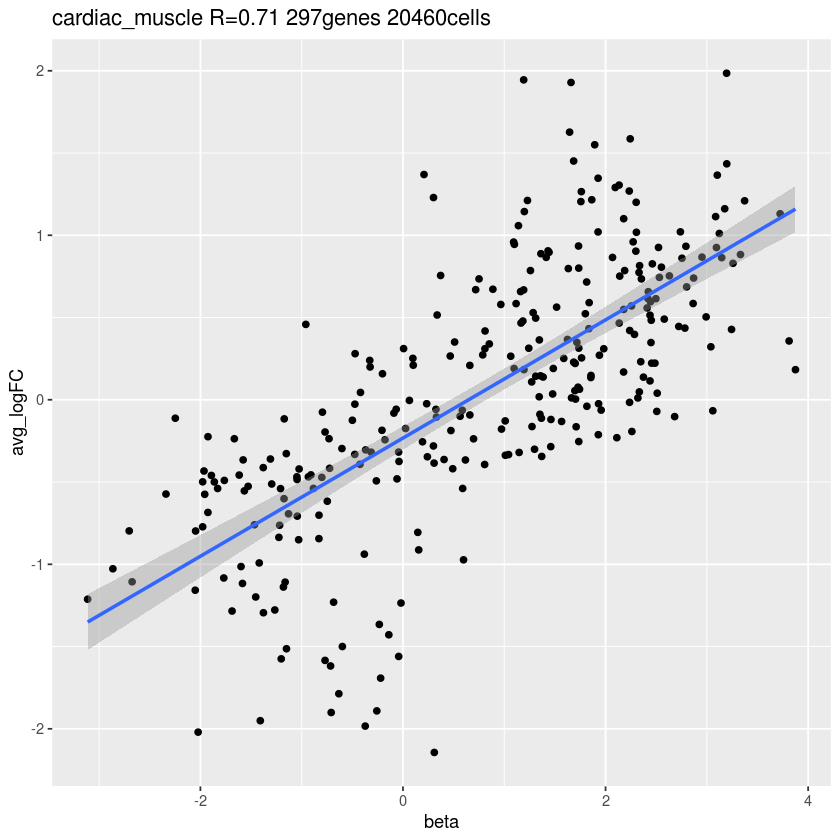

In [128]:
target <- "cardiac_muscle"
avg_logFC <- read.table(paste0("avg_logFC/", target, ".txt"), header=T)
func_p(target, avg_logFC %>% filter(f.1>=0.1 | f.2>=0.1))

`geom_smooth()` using formula 'y ~ x'



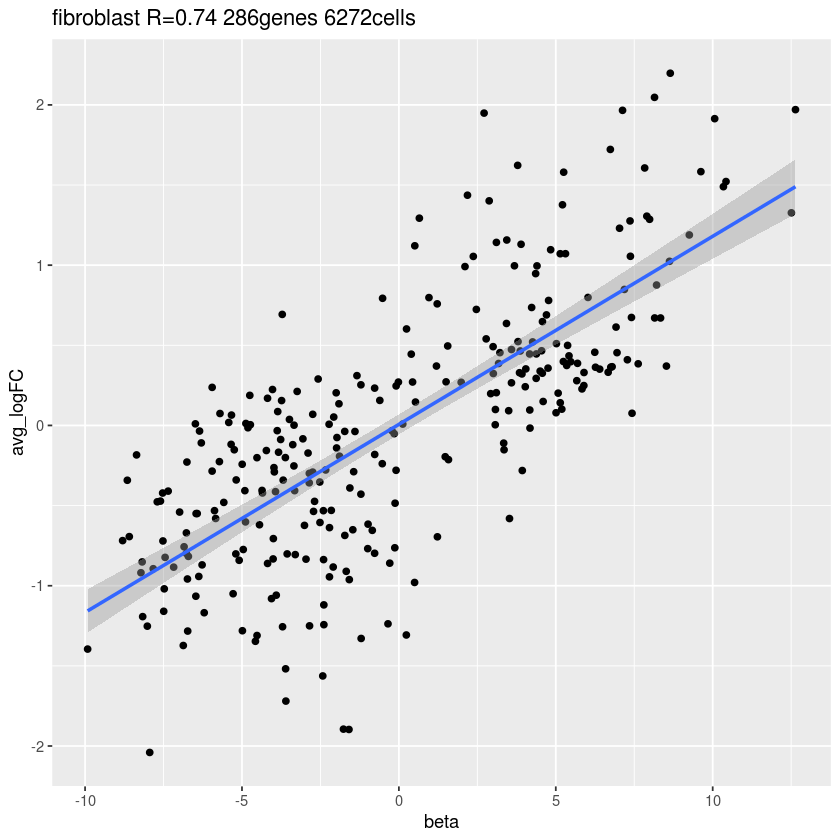

In [130]:
target <- "fibroblast"
avg_logFC <- read.table(paste0("avg_logFC/", target, ".txt"), header=T)
func_p(target, avg_logFC %>% filter(f.1>=0.1 | f.2>=0.1))

`geom_smooth()` using formula 'y ~ x'



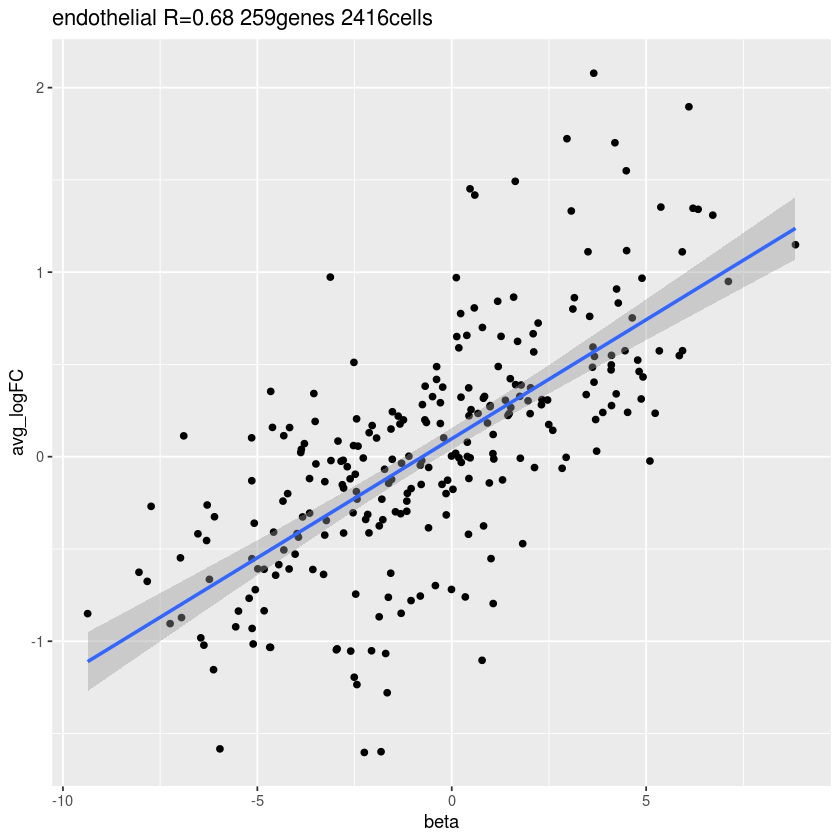

In [129]:
target <- "endothelial"
avg_logFC <- read.table(paste0("avg_logFC/", target, ".txt"), header=T)
func_p(target, avg_logFC %>% filter(f.1>=0.1 | f.2>=0.1))

`geom_smooth()` using formula 'y ~ x'



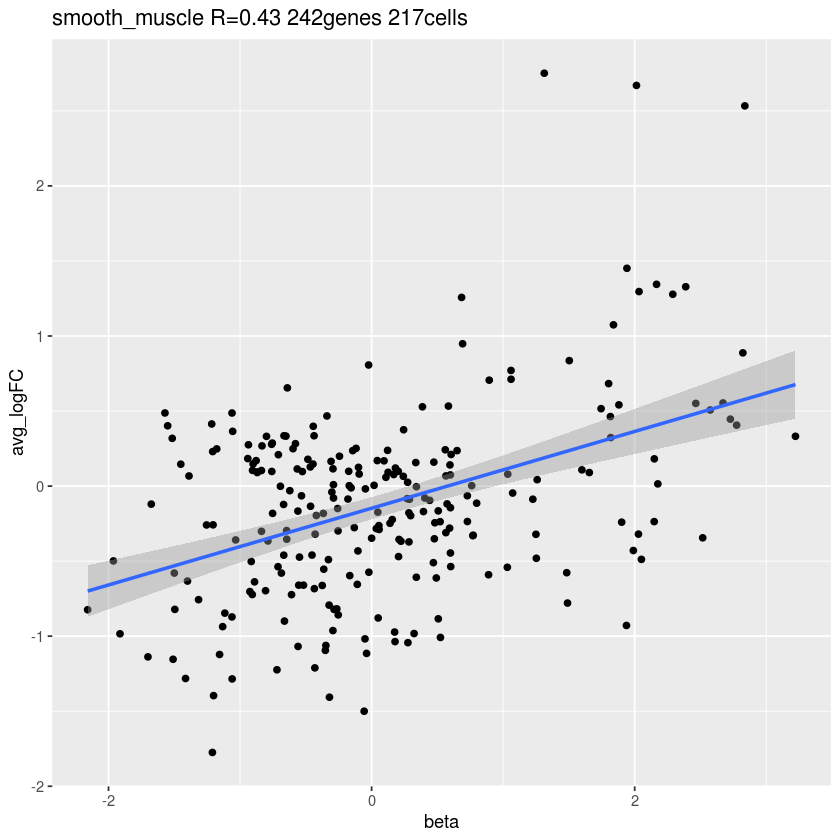

In [131]:
target <- "smooth_muscle"
avg_logFC <- read.table(paste0("avg_logFC/", target, ".txt"), header=T)
func_p(target, avg_logFC %>% filter(f.1>=0.1 | f.2>=0.1))